# Практика 7 Непрерывные Цепи Маркова (CTMC)
## Непрерывная Цепь Маркова (CTMC)

**Определение:**
Непрерывная Цепь Маркова — стохастический процесс, в котором переходы между состояниями происходят в случайные моменты времени.

**Характеристика:**
- Будущее зависит только от текущего состояния (Марковское свойство).
- Время пребывания в каждом состоянии распределено экспоненциально.
- Переходы происходят в непрерывном времени.

**Отличие от DTMC:**
| Свойство | DTMC | CTMC |
|-----------|------|------|
| Время переходов | Дискретное | Непрерывное |
| Распределение времени пребывания | Не определено явно | Экспоненциальное |


##**Ключевые понятия CTMC:**

1. Множество состояний ($S$)
Совокупность всех возможных состояний, в которых может находиться система. Для простоты, мы рассматриваем конечное число состояний, например:
$$
S = \{0, 1, 2, \ldots, n-1\}
$$
где $n$ — количество состояний.

2. Генераторная матрица (Q-матрица)
Это матрица $Q$ размера $n \times n$, описывающая интенсивности переходов между состояниями в CTMC.
<ul><ul>
* Диагональные элементы $q_{ii}$: Всегда отрицательны. Равны суммарной интенсивности "ухода" из состояния $i$ во все остальные:
$$
q_{ii} = -\sum_{j \ne i} q_{ij}
$$ <br>
* Недиагональные элементы $q_{ij}$, $i \ne j$: Всегда неотрицательны. Описывают интенсивность перехода из состояния $i$ в состояние $j$. Время пребывания в состоянии $i$ до перехода в $j$ экспоненциально распределено с параметром $\lambda = q_{ij}$.
</ul></ul>
Важное свойство генераторной матрицы Сумма элементов каждой строки матрицы $Q$ равна нулю:

$$
\sum_{j=0}^{n-1} q_{ij} = 0
$$
для всех $i$.

##**Основные задачи при работе с CTMC:**
1. Расчет стационарного распределения ($π$)
   * Что это: Если система находится в работе достаточно долго, она достигает стационарного режима, где вероятности нахождения в каждом состоянии перестают изменяться со временем. Это описывается вектором стационарного распределения: $\pi = (\pi_0, \pi_1, \ldots, \pi_{n-1})$

   * Уравнение: Стационарное распределение удовлетворяет уравнению: $$\pi Q = 0$$ где  0 — нулевой вектор.

   * Условие нормировки: Вероятности должны суммироваться в единицу: $$\sum_{i=0}^{n-1} \pi_i = 1 $$
   * Существование: Стационарное распределение существует для связанных цепей Маркова (то есть из любого состояния можно достичь любого другого состояния, возможно, через промежуточные).

##2. Расчет вероятностей перехода ($P(t)$)
  - Что это: Матрица $P(t)$, где $P_{ij}(t)$ — вероятность перехода из состояния i в состояние j ровно за время t.

   - Формула: Вероятности перехода рассчитываются с помощью матричной экспоненты: $$ P(t) = e^{Qt} $$ где $e^{Qt}$ — это экспонента матрицы Qt.
# Часть 1: Формирование Q-матрицы и расчет стационарного распределения




## Задача 1.1: Определение CTMC

Рассмотрим простую систему с тремя состояниями (\(0\), \(1\), \(2\)) — например, для модели обслуживания в системе.

- **Состояние 0:** Система простаивает (нет клиентов).
- **Состояние 1:** Система обслуживает одного клиента.
- **Состояние 2:** Система перегружена (есть очередь).
## Интенсивности переходов

- **Из состояния 0 (простой):**
  - Приходит новый клиент (переход в 1) со скоростью $ q_{01} = 0.5$ (в среднем, новый клиент приходит каждые  $    1 / 0.5 = 2$     единицы времени).
  - Остается в состоянии 0 (нет перехода):  $q_{00} = -q_{01} = -0.5$

- **Из состояния 1 (обслуживание 1 клиента):**
   - Клиент уходит (переход в 0) со скоростью $q_{10} = 0.2$ (в среднем, обслуживание заканчивается каждые $1 / 0.2 = 5 единиц времени)$.
  - Приходят новые клиенты, пока обслуживается текущий (переход в 2) со скоростью $ q_{12} = 0.3$ (новый клиент прибывает, пока идет обслуживание, каждые  $    1 / 0.3 \approx 3.33$    единицы времени).
  - Остается в состоянии 1: $q_{11} = -(q_{10} + q_{12}) = -(0.2 + 0.3) = -0.5  $
 - **Из состояния 2 (перегрузка):**
   - Обслуживание одного клиента завершается, и система переходит к обслуживанию следующего (переход в 1) со скоростью $ q_{21} = 0.4 $ (начинается обслуживание следующего, среднее время   $\approx 2.5$ ).
  - Остается в состоянии 2 (нет ухода из состояния 2, только переход в 1): $   q_{22} = -q_{21} = -0.4$
<br>
<br><br><br><br><br><br><br>

<br>
<br><br><br><br><br><br><br>
<br>
<br><br><br><br><br><br><br>









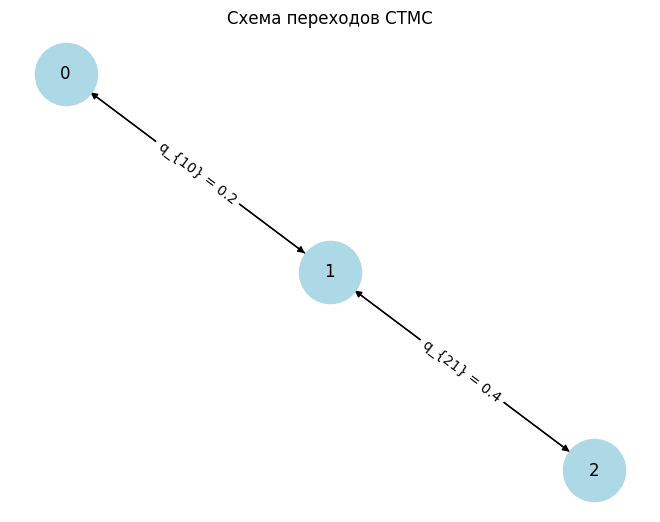

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Добавляем стрелки с метками скоростей
G.add_edge('0', '1', label='q_{01} = 0.5')
G.add_edge('1', '0', label='q_{10} = 0.2')
G.add_edge('1', '2', label='q_{12} = 0.3')
G.add_edge('2', '1', label='q_{21} = 0.4')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Схема переходов CTMC')
plt.show()


## Задача 1.2: Формирование Q-матрицы

Представьте эти интенсивности в виде матрицы

In [2]:
import numpy as np
from scipy.stats import expon
from scipy.linalg import expm
# from scipy.optimize import linprog # Может понадобиться для других систем

# --- Определение Q-матрицы ---
N_STATES = 3 # Количество состояний

Q = np.array([[-0.5,  0.5,  0. ],
              [ 0.2, -0.5,  0.3],
              [ 0.,   0.4, -0.4]])

print("--- Q-матрица ---")
print(Q)

# Проверка: сумма каждой строки должна быть равна 0
print("\nСуммы строк Q:")
print(np.sum(Q, axis=1))

--- Q-матрица ---
[[-0.5  0.5  0. ]
 [ 0.2 -0.5  0.3]
 [ 0.   0.4 -0.4]]

Суммы строк Q:
[0. 0. 0.]


### Задача 1.3: Расчет стационарного распределения

Найдите стационарное распределение $\pi = (\pi_0, \pi_1, \pi_2)$
такое, что $\pi Q = 0$ и $\pi_0 + \pi_1 + \pi_2 = 1 $

**Уравнение:**

$$
\pi Q = 0
$$

и

$$
\sum_{i=0}^{n-1} \pi_i = 1
$$

In [3]:
# --- Расчет стационарного распределения ---
# Решаем систему: pi * Q = 0  и  sum(pi_i) = 1

A_solve = np.vstack(Q.T) # Строки Q.T + строка единиц
A_solve[-1, :] = np.ones(N_STATES) # Заменяем последнюю строку на строку единиц
b_solve = np.zeros(N_STATES)
b_solve[-1] = 1 # Условие нормировки sum(pi_i) = 1
try:
    stationary_distribution_vector = np.linalg.solve(A_solve, b_solve)

    print("--- Стационарное распределение pi ---")
    for i, prob in enumerate(stationary_distribution_vector):
        print(f"  P(State {i}) = {prob:.4f}")
    print(f"Сумма вероятностей: {np.sum(stationary_distribution_vector):.4f}\n")
    print("Интерпретация:")
    print(f"- Состояние 0 (Простой): {stationary_distribution_vector[0]*100:.1f}% времени.")
    print(f"- Состояние 1 (Обслуживание): {stationary_distribution_vector[1]*100:.1f}% времени.")
    print(f"- Состояние 2 (Перегрузка): {stationary_distribution_vector[2]*100:.1f}% времени.")

except np.linalg.LinAlgError:
    print("Не удалось найти стационарное распределение. Проверьте корректность Q-матрицы.")

--- Стационарное распределение pi ---
  P(State 0) = 0.1860
  P(State 1) = 0.4651
  P(State 2) = 0.3488
Сумма вероятностей: 1.0000

Интерпретация:
- Состояние 0 (Простой): 18.6% времени.
- Состояние 1 (Обслуживание): 46.5% времени.
- Состояние 2 (Перегрузка): 34.9% времени.


In [4]:
from scipy.linalg import expm

times = [1, 5, 10] # Времена для расчета P(t)

print(f"{Q}")
print("--- Матрицы вероятностей перехода P(t) ---")
for t in times:
    Pt = expm(Q * t) # Матричная экспонента
    print(f"\nP(t={t}):")
    print(Pt)

    # Проверка: сумма каждой строки P(t) должна быть равна 1
    print(f"  Суммы строк P(t={t}): {np.sum(Pt, axis=1)}")

[[-0.5  0.5  0. ]
 [ 0.2 -0.5  0.3]
 [ 0.   0.4 -0.4]]
--- Матрицы вероятностей перехода P(t) ---

P(t=1):
[[0.63742351 0.31466501 0.04791148]
 [0.12586601 0.67575269 0.1983813 ]
 [0.02555279 0.26450841 0.7099388 ]]
  Суммы строк P(t=1): [1. 1. 1.]

P(t=5):
[[0.24485506 0.47258308 0.28256185]
 [0.18903323 0.47090455 0.34006222]
 [0.15069965 0.45341629 0.39588405]]
  Суммы строк P(t=5): [1. 1. 1.]

P(t=10):
[[0.19186988 0.46637403 0.34175608]
 [0.18654961 0.46527475 0.34817564]
 [0.18226991 0.46423418 0.35349591]]
  Суммы строк P(t=10): [1. 1. 1.]


## Часть 3: Моделирование поведения CTMC

### Задача 3.1: Симуляция траектории CTMC

Симуляция позволяет увидеть, как система переходит из состояния в состояние во времени.
Для этого моделируется время пребывания в каждом состоянии (экспоненциально распределенное) и выбирается следующее состояние согласно интенсивностям переходов.

--- Симуляция траекторий CTMC (начальное состояние 0, макс. время 15.0) ---
  Симуляция 1: Начало -> 0, Конец -> 2 (Время: 7.40)
  Симуляция 2: Начало -> 0, Конец -> 1 (Время: 11.40)
  Симуляция 3: Начало -> 0, Конец -> 0 (Время: 0.00)


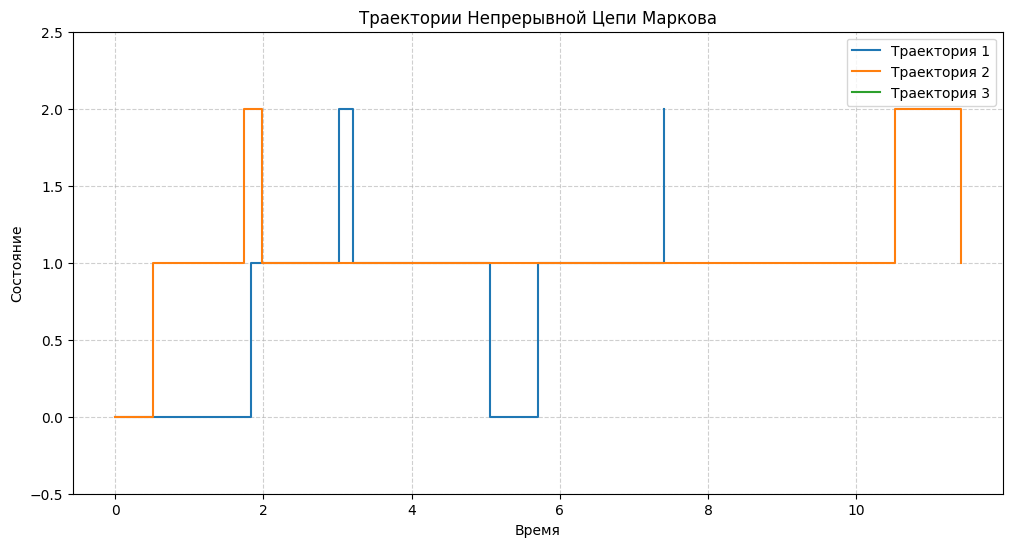

In [5]:
from numpy.random import choice, exponential

def simulate_ctmc(Q, start_state, max_time):
    """
    Симулирует траекторию непрерывной цепи Маркова.
    """
    num_states = Q.shape[0]
    current_state = start_state
    current_time = 0.0

    time_points = [current_time]
    states = [current_state]

    while current_time < max_time:
        transition_rates_from_current = Q[current_state, :]
        exit_rate = -transition_rates_from_current[current_state]

        if exit_rate < 1e-9: # Если скорость ухода равна 0
            break

        # Время пребывания в текущем состоянии: T ~ Exp(exit_rate)
        time_in_state = exponential(scale=1.0/exit_rate)

        current_time += time_in_state

        if current_time > max_time:
            break

        rates_to_other_states = np.delete(transition_rates_from_current, current_state)
        possible_next_states_indices = [j for j in range(num_states) if j != current_state]

        if possible_next_states_indices:
            probabilities = rates_to_other_states / np.sum(rates_to_other_states)
            next_state = choice(possible_next_states_indices, p=probabilities)
        else:
            break

        current_state = next_state
        time_points.append(current_time)
        states.append(current_state)

    return time_points, states

# --- Параметры симуляции ---
START_STATE = 0
MAX_SIMULATION_TIME = 15.0
N_SIMULATIONS = 3 # Количество траекторий для примера

print(f"--- Симуляция траекторий CTMC (начальное состояние {START_STATE}, макс. время {MAX_SIMULATION_TIME}) ---")

trajectories = []
for i in range(N_SIMULATIONS):
    time_pts, sts = simulate_ctmc(Q, START_STATE, MAX_SIMULATION_TIME)
    trajectories.append((time_pts, sts))
    print(f"  Симуляция {i+1}: Начало -> {sts[0]}, Конец -> {sts[-1]} (Время: {time_pts[-1]:.2f})")

# --- Визуализация траекторий ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, (time_pts, sts) in enumerate(trajectories):
    plt.step(time_pts, sts, where='post', label=f'Траектория {i+1}')

plt.title('Траектории Непрерывной Цепи Маркова')
plt.xlabel('Время')
plt.ylabel('Состояние')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(-0.5, N_STATES - 0.5) # Устанавливаем границы для состояний
plt.show()

## Требования к отчету

В отчет по практической работе должны войти:

1. **Теоретический обзор:** Краткое объяснение понятий CTMC, Q-матрицы, стационарного распределения $ P(t) $ (можно использовать введение из данного документа).
2. **Код:** Полный код, разделенный на ячейки (Python и Markdown).
3. **Вывод программы:** Результаты выполнения всех задач (Q-матрицы, стационарное распределение, матрицы $ P(t) $, результаты симуляции, результаты практической задачи).
4. **Анализ:**
    - Интерпретация стационарного распределения для системы обслуживания.
    - Объяснение, как интерпретировать матрицы $ P(t) $.
    - Описание результатов симуляции траекторий (что показывает график?).
    - Анализ прогноза состояния системы через 5 единиц времени.
5. **Визуализация:** График траектории CTMC.